# LASSO

## This notebook consists of the following:
- Part 1: Load data
- Part 2: LASSO regressions
- - 2.1: Baseline model without polynomials
- - 2.1: Baseline model with polynomials
- - 2.3: Extended model without polynomials
- - 2.4: Extended model with polynomials
- Part 3: Producing variable-lists
- Part 4: Combining visualisations of hyperparameter tuning graphs

In [1]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error


%matplotlib inline

# 1: Load data


In [2]:
# Load the CSV file with data
Data = pd.read_csv('4_Final_data.csv')

# 2.1: Baseline model without polynomials

Subdata: Best alpha = 0.14174741629268062
Subdata: Training RMSE = 1973.063164333417
Subdata: Test RMSE = 2006.6057871399853


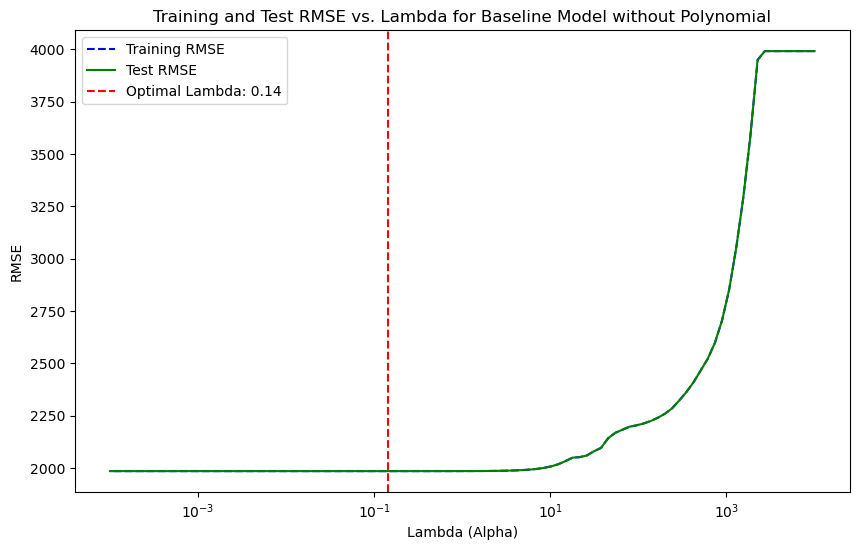

In [3]:
# Subdata preparation
X_sub = Data.drop(['Monthly rent', 'Longitude', 'Latitude', 'PostalCode_1000-1999', 'Floor_-1 to 0', 
                   'Distance to Transport Station (km)', 'Distance to Beach (km)', 'Distance to School (km)', 
                   'Distance to Restaurant (km)', 'Distance to Hospital (km)', 'Distance to Mall (km)'], axis=1)
y_sub = Data['Monthly rent']

X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_sub, y_sub, test_size=0.3, random_state=69)

# Scaling the subdata
scaler_sub = StandardScaler().fit(X_train_sub)
X_train_sub_scaled = scaler_sub.transform(X_train_sub)
X_test_sub_scaled = scaler_sub.transform(X_test_sub)

# Manually specify a broader range of alphas
alphas_to_test = np.logspace(-4, 4, 100)

# LASSO with cross-validation on subdata
lasso_cv_sub = LassoCV(alphas=alphas_to_test, cv=10, max_iter=10000)
lasso_cv_sub.fit(X_train_sub_scaled, y_train_sub)

# Predictions
y_pred_train_sub = lasso_cv_sub.predict(X_train_sub_scaled)
y_pred_test_sub = lasso_cv_sub.predict(X_test_sub_scaled)

# RMSE
rmse_train_sub = np.sqrt(mean_squared_error(y_train_sub, y_pred_train_sub))
rmse_test_sub = np.sqrt(mean_squared_error(y_test_sub, y_pred_test_sub))

print(f"Subdata: Best alpha = {lasso_cv_sub.alpha_}")
print(f"Subdata: Training RMSE = {rmse_train_sub}")
print(f"Subdata: Test RMSE = {rmse_test_sub}")

# Calculate training RMSE for each alpha
train_mse = np.mean(lasso_cv_sub.mse_path_, axis=1)
train_rmse = np.sqrt(train_mse)

# Calculate test RMSE for each alpha
test_rmse = np.sqrt(lasso_cv_sub.mse_path_.mean(axis=-1))

# Plotting RMSE vs. Lambda
plt.figure(figsize=(10, 6))
plt.plot(lasso_cv_sub.alphas_, train_rmse, label='Training RMSE', color='blue', linestyle='--')
plt.plot(lasso_cv_sub.alphas_, test_rmse, label='Test RMSE', color='green')
plt.axvline(lasso_cv_sub.alpha_, linestyle='--', color='red', label=f'Optimal Lambda: {lasso_cv_sub.alpha_:.2f}')
plt.xscale('log')
plt.xlabel('Lambda (Alpha)')
plt.ylabel('RMSE')
plt.title('Training and Test RMSE vs. Lambda for Baseline Model without Polynomial')
plt.savefig("RMSE_vs_Lambda_Baseline_Without.png")
plt.legend()
plt.show()

# 2.2: Baseline model with polynomials

Subdata with Polynomial Features: Best alpha = 14.849682622544666
Subdata with Polynomial Features: Training RMSE = 1656.3689699887727
Subdata with Polynomial Features: Test RMSE = 1797.8537804281818


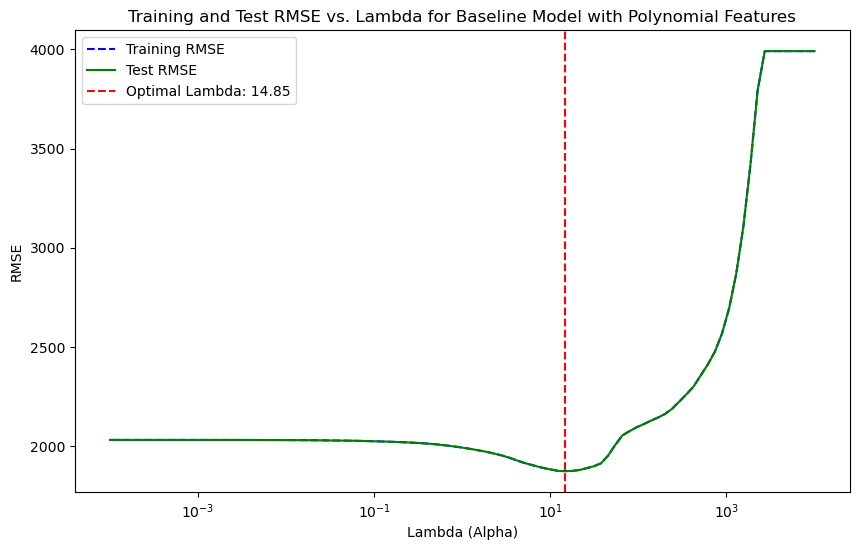

In [4]:
# Subdata preparation
X_sub = Data.drop(['Monthly rent', 'Longitude', 'Latitude', 'PostalCode_1000-1999', 'Floor_-1 to 0', 
                   'Distance to Transport Station (km)', 'Distance to Beach (km)', 'Distance to School (km)', 
                   'Distance to Restaurant (km)', 'Distance to Hospital (km)', 'Distance to Mall (km)'], axis=1)
y_sub = Data['Monthly rent']

# Generating polynomial features for subdata
poly_sub = PolynomialFeatures(degree=2, include_bias=False)
X_sub_poly = poly_sub.fit_transform(X_sub)

X_train_sub_poly, X_test_sub_poly, y_train_sub, y_test_sub = train_test_split(X_sub_poly, y_sub, test_size=0.3, random_state=69)

# Scaling the subdata
scaler_sub_poly = StandardScaler().fit(X_train_sub_poly)
X_train_sub_poly_scaled = scaler_sub_poly.transform(X_train_sub_poly)
X_test_sub_poly_scaled = scaler_sub_poly.transform(X_test_sub_poly)

# Manually specify a broader range of alphas
alphas_to_test = np.logspace(-4, 4, 100)

# LASSO with cross-validation on subdata
lasso_cv_sub_poly = LassoCV(alphas=alphas_to_test, cv=10, max_iter=10000)
lasso_cv_sub_poly.fit(X_train_sub_poly_scaled, y_train_sub)

# Predictions
y_pred_train_sub_poly = lasso_cv_sub_poly.predict(X_train_sub_poly_scaled)
y_pred_test_sub_poly = lasso_cv_sub_poly.predict(X_test_sub_poly_scaled)

# RMSE
rmse_train_sub_poly = np.sqrt(mean_squared_error(y_train_sub, y_pred_train_sub_poly))
rmse_test_sub_poly = np.sqrt(mean_squared_error(y_test_sub, y_pred_test_sub_poly))

print(f"Subdata with Polynomial Features: Best alpha = {lasso_cv_sub_poly.alpha_}")
print(f"Subdata with Polynomial Features: Training RMSE = {rmse_train_sub_poly}")
print(f"Subdata with Polynomial Features: Test RMSE = {rmse_test_sub_poly}")

# Calculate training RMSE for each alpha
train_mse_poly = np.mean(lasso_cv_sub_poly.mse_path_, axis=1)
train_rmse_poly = np.sqrt(train_mse_poly)

# Calculate test RMSE for each alpha
test_rmse_poly = np.sqrt(lasso_cv_sub_poly.mse_path_.mean(axis=-1))

# Plotting RMSE vs. Lambda
plt.figure(figsize=(10, 6))
plt.plot(lasso_cv_sub_poly.alphas_, train_rmse_poly, label='Training RMSE', color='blue', linestyle='--')
plt.plot(lasso_cv_sub_poly.alphas_, test_rmse_poly, label='Test RMSE', color='green')
plt.axvline(lasso_cv_sub_poly.alpha_, linestyle='--', color='red', label=f'Optimal Lambda: {lasso_cv_sub_poly.alpha_:.2f}')
plt.xscale('log')
plt.xlabel('Lambda (Alpha)')
plt.ylabel('RMSE')
plt.title('Training and Test RMSE vs. Lambda for Baseline Model with Polynomial Features')
plt.legend()
plt.savefig("RMSE_vs_Lambda_Subdata_Poly.png")
plt.show()

# 2.3 Extended model without polynomials

Full Data: Best alpha = 0.06734150657750829
Full Data: Training RMSE = 1862.2198788485848
Full Data: Test RMSE = 1910.503486587206


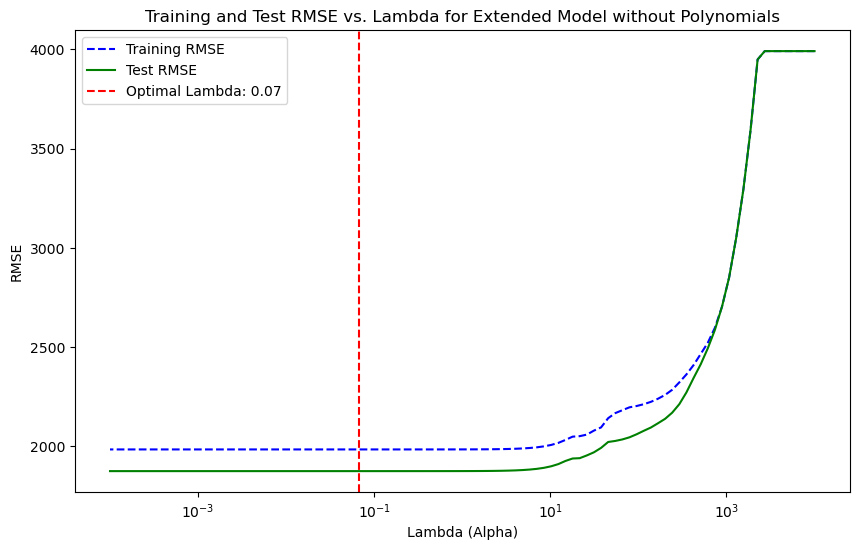

In [5]:

# Splitting the data
X_full = Data.drop(['Monthly rent', 'Longitude', 'Latitude', 'PostalCode_1000-1999', 'Floor_-1 to 0'], axis=1)
y_full = Data['Monthly rent']

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.3, random_state=69)

# Scaling the data
scaler_full = StandardScaler().fit(X_train_full)
X_train_full_scaled = scaler_full.transform(X_train_full)
X_test_full_scaled = scaler_full.transform(X_test_full)

# Manually specify a broader range of alphas
alphas_to_test = np.logspace(-4, 4, 100)

# LASSO with cross-validation
lasso_cv_full = LassoCV(alphas=alphas_to_test, cv=10, max_iter=10000)
lasso_cv_full.fit(X_train_full_scaled, y_train_full)

# Predictions
y_pred_train_full = lasso_cv_full.predict(X_train_full_scaled)
y_pred_test_full = lasso_cv_full.predict(X_test_full_scaled)

# RMSE
rmse_train_full = np.sqrt(mean_squared_error(y_train_full, y_pred_train_full))
rmse_test_full = np.sqrt(mean_squared_error(y_test_full, y_pred_test_full))

print(f"Full Data: Best alpha = {lasso_cv_full.alpha_}")
print(f"Full Data: Training RMSE = {rmse_train_full}")
print(f"Full Data: Test RMSE = {rmse_test_full}")

# Calculate training RMSE for each alpha
train_mse_full = np.mean(lasso_cv_full.mse_path_, axis=1)
train_rmse_full = np.sqrt(train_mse)

# Calculate test RMSE for each alpha
test_rmse_full = np.sqrt(lasso_cv_full.mse_path_.mean(axis=-1))

# Plotting RMSE vs. Lambda
plt.figure(figsize=(10, 6))
plt.plot(lasso_cv_full.alphas_, train_rmse_full, label='Training RMSE', color='blue', linestyle='--')
plt.plot(lasso_cv_full.alphas_, test_rmse_full, label='Test RMSE', color='green')
plt.axvline(lasso_cv_full.alpha_, linestyle='--', color='red', label=f'Optimal Lambda: {lasso_cv_full.alpha_:.2f}')
plt.xscale('log')
plt.xlabel('Lambda (Alpha)')
plt.ylabel('RMSE')
plt.title('Training and Test RMSE vs. Lambda for Extended Model without Polynomials')
plt.legend()
plt.savefig("RMSE_vs_Lambda_FullData.png")
plt.show()


# 2.4: Extended model with polynomials

Full Data with Polynomial Features: Best alpha = 7.054802310718645
Full Data with Polynomial Features: Training RMSE = 1340.2541550290873
Full Data with Polynomial Features: Test RMSE = 1554.3424000494547


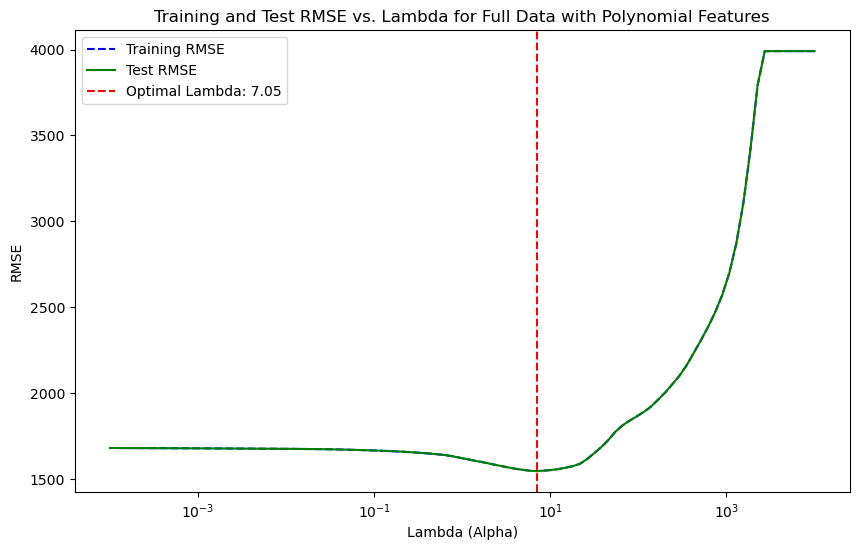

In [6]:
# Splitting the data
X_full = Data.drop(['Monthly rent', 'Longitude', 'Latitude', 'PostalCode_1000-1999', 'Floor_-1 to 0'], axis=1)
y_full = Data['Monthly rent']

# Generating polynomial features
poly_full = PolynomialFeatures(degree=2, include_bias=False)
X_full_poly = poly_full.fit_transform(X_full)

X_train_full_poly, X_test_full_poly, y_train_full_poly, y_test_full_poly = train_test_split(X_full_poly, y_full, test_size=0.3, random_state=69)

# Scaling the data
scaler_full_poly = StandardScaler().fit(X_train_full_poly)
X_train_full_poly_scaled = scaler_full_poly.transform(X_train_full_poly)
X_test_full_poly_scaled = scaler_full_poly.transform(X_test_full_poly)

# Manually specify a broader range of alphas
alphas_to_test = np.logspace(-4, 4, 100)

# LASSO with cross-validation
lasso_cv_full_poly = LassoCV(alphas=alphas_to_test, cv=10, max_iter=10000)
lasso_cv_full_poly.fit(X_train_full_poly_scaled, y_train_full_poly)

# Predictions
y_pred_train_full_poly = lasso_cv_full_poly.predict(X_train_full_poly_scaled)
y_pred_test_full_poly = lasso_cv_full_poly.predict(X_test_full_poly_scaled)

# RMSE
rmse_train_full_poly = np.sqrt(mean_squared_error(y_train_full_poly, y_pred_train_full_poly))
rmse_test_full_poly = np.sqrt(mean_squared_error(y_test_full_poly, y_pred_test_full_poly))

print(f"Full Data with Polynomial Features: Best alpha = {lasso_cv_full_poly.alpha_}")
print(f"Full Data with Polynomial Features: Training RMSE = {rmse_train_full_poly}")
print(f"Full Data with Polynomial Features: Test RMSE = {rmse_test_full_poly}")

# Calculate training RMSE for each alpha
train_mse_full_poly = np.mean(lasso_cv_full_poly.mse_path_, axis=1)
train_rmse_full_poly = np.sqrt(train_mse_full_poly)

# Calculate test RMSE for each alpha
test_rmse_full_poly = np.sqrt(lasso_cv_full_poly.mse_path_.mean(axis=-1))

# Plotting RMSE vs. Lambda
plt.figure(figsize=(10, 6))
plt.plot(lasso_cv_full_poly.alphas_, train_rmse_full_poly, label='Training RMSE', color='blue', linestyle='--')
plt.plot(lasso_cv_full_poly.alphas_, test_rmse_full_poly, label='Test RMSE', color='green')
plt.axvline(lasso_cv_full_poly.alpha_, linestyle='--', color='red', label=f'Optimal Lambda: {lasso_cv_full_poly.alpha_:.2f}')
plt.xscale('log')
plt.xlabel('Lambda (Alpha)')
plt.ylabel('RMSE')
plt.title('Training and Test RMSE vs. Lambda for Full Data with Polynomial Features')
plt.legend()
plt.savefig("RMSE_vs_Lambda_Extended_med_Polynomials.png")
plt.show()


# Part 3: Generate list of features for all 4 models (data for table in Appendix)

In [7]:
# Function to extract and print coefficients for original features
def display_original_feature_coeffs(model, feature_names, data_name):
    coefficients = model.coef_
    feature_coefficient_pairs = list(zip(feature_names, coefficients))
    sorted_feature_coefficient_pairs = sorted(feature_coefficient_pairs, key=lambda x: abs(x[1]), reverse=True)
    
    # Extract only the original features
    original_features = X_full.columns.tolist()
    original_feature_coeffs = [(feature, coef) for feature, coef in sorted_feature_coefficient_pairs if feature in original_features]
    
    print(f"\nCoefficients for {data_name}:")
    for feature, coef in original_feature_coeffs:
        print(f"{feature}: {coef:.4f}")
    
    # Count non-zero coefficients
    non_zero_coeffs = [coef for _, coef in feature_coefficient_pairs if abs(coef) > 1e-5]
    
    # Print the total number of non-zero features
    print(f"\nTotal number of non-zero features in {data_name}: {len(non_zero_coeffs)}")

# Version 1: Subdata without Polynomial Features
feature_names_sub = X_sub.columns.tolist()
display_original_feature_coeffs(lasso_cv_sub, feature_names_sub, "Baseline without Polynomial Features")

# Version 2: Subdata with Polynomial Features
feature_names_sub_poly = poly_sub.get_feature_names(input_features=X_sub.columns)
display_original_feature_coeffs(lasso_cv_sub_poly, feature_names_sub_poly, "Baseline with Polynomial Features")

# Version 3: Full Data without Polynomial Features
feature_names_full = X_full.columns.tolist()
display_original_feature_coeffs(lasso_cv_full, feature_names_full, "Extended without Polynomial Features")

# Version 4: Full Data with Polynomial Features
feature_names_full_poly = poly_full.get_feature_names(input_features=X_full.columns)
display_original_feature_coeffs(lasso_cv_full_poly, feature_names_full_poly, "Extended with Polynomial Features")



Coefficients for Baseline without Polynomial Features:
PostalCode_8000-8999: -4828.0568
PostalCode_9000-9999: -4528.6769
PostalCode_7000-7999: -3573.2715
PostalCode_6000-6999: -3485.3768
PostalCode_5000-5999: -3229.8590
PostalCode_2000-2999: -2111.6872
Square meters: 1980.3811
PostalCode_4000-4999: -1927.5009
PostalCode_3000-3999: -1009.6509
Elevator: 611.3665
Floor_3-8: 275.1038
Balcony/Terrace: 272.0085
Only for students: -171.2723
Furnished: 154.7401
Shareable: 136.6454
Aconto: -120.8795
Pets allowed: 105.7115
Floor_9 or above: 91.4147
Rooms: -78.4559
Senior frendly: 31.7913
Floor_1-3: -22.5559
Parking: 4.1821

Total number of non-zero features in Baseline without Polynomial Features: 22

Coefficients for Baseline with Polynomial Features:
Square meters: 2863.7307
PostalCode_9000-9999: -359.5296
PostalCode_7000-7999: -279.4239
PostalCode_6000-6999: -264.6996
PostalCode_8000-8999: -140.8967
PostalCode_5000-5999: -113.1586
Furnished: 113.1133
Rooms: 37.3035
Aconto: -0.0000
Shareable:

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Part 4: Combine plots (final figure appears in Paper Appendix)

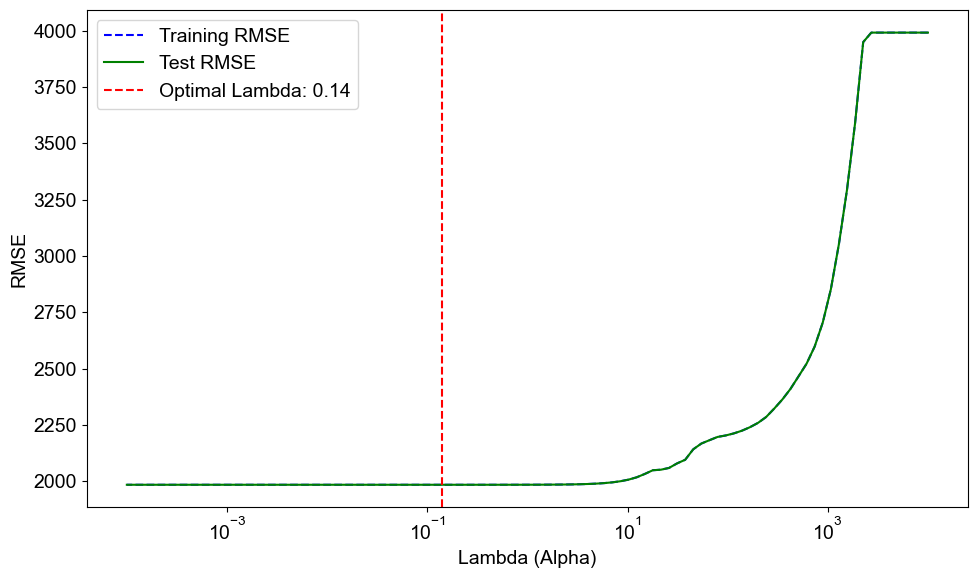

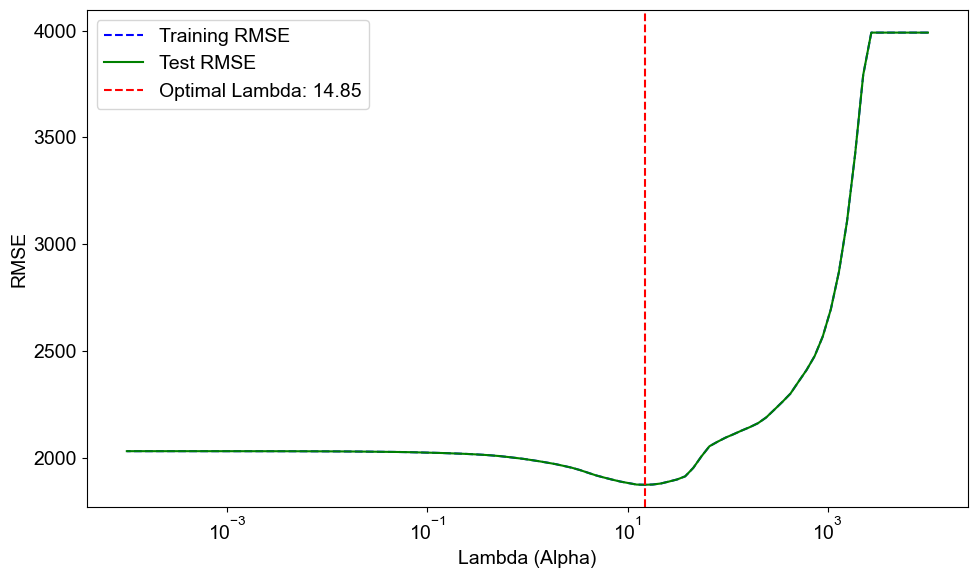

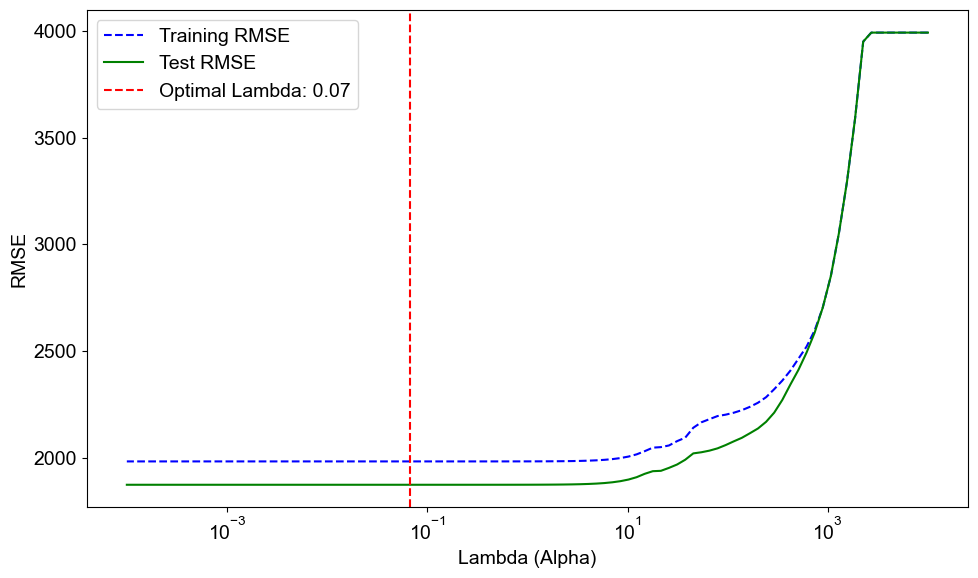

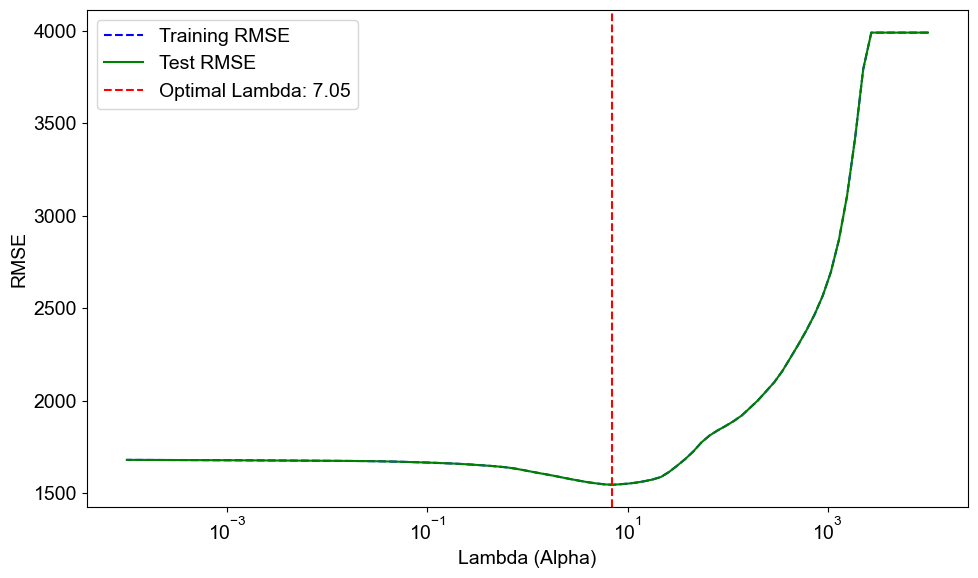

In [18]:
import matplotlib.pyplot as plt

# Set global font details
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 14

def plot_rmse_vs_lambda(model, train_rmse, test_rmse, save_as):
    plt.figure(figsize=(10, 6))
    plt.plot(model.alphas_, train_rmse, label='Training RMSE', color='blue', linestyle='--')
    plt.plot(model.alphas_, test_rmse, label='Test RMSE', color='green')
    plt.axvline(model.alpha_, linestyle='--', color='red', label=f'Optimal Lambda: {model.alpha_:.2f}')
    plt.xscale('log')
    plt.xlabel('Lambda (Alpha)')
    plt.ylabel('RMSE')
    # Removed the title line
    plt.legend()
    plt.tight_layout()
    plt.savefig(save_as, dpi=300)
    plt.show()

# Plot 1
plot_rmse_vs_lambda(lasso_cv_sub, train_rmse, test_rmse, "RMSE_vs_Lambda_Baseline_Without.png")

# Plot 2
plot_rmse_vs_lambda(lasso_cv_sub_poly, train_rmse_poly, test_rmse_poly, "RMSE_vs_Lambda_Subdata_Poly.png")

# Plot 3
plot_rmse_vs_lambda(lasso_cv_full, train_rmse_full, test_rmse_full, "RMSE_vs_Lambda_FullData.png")

# Plot 4
plot_rmse_vs_lambda(lasso_cv_full_poly, train_rmse_full_poly, test_rmse_full_poly, "RMSE_vs_Lambda_Extended_med_Polynomials.png")


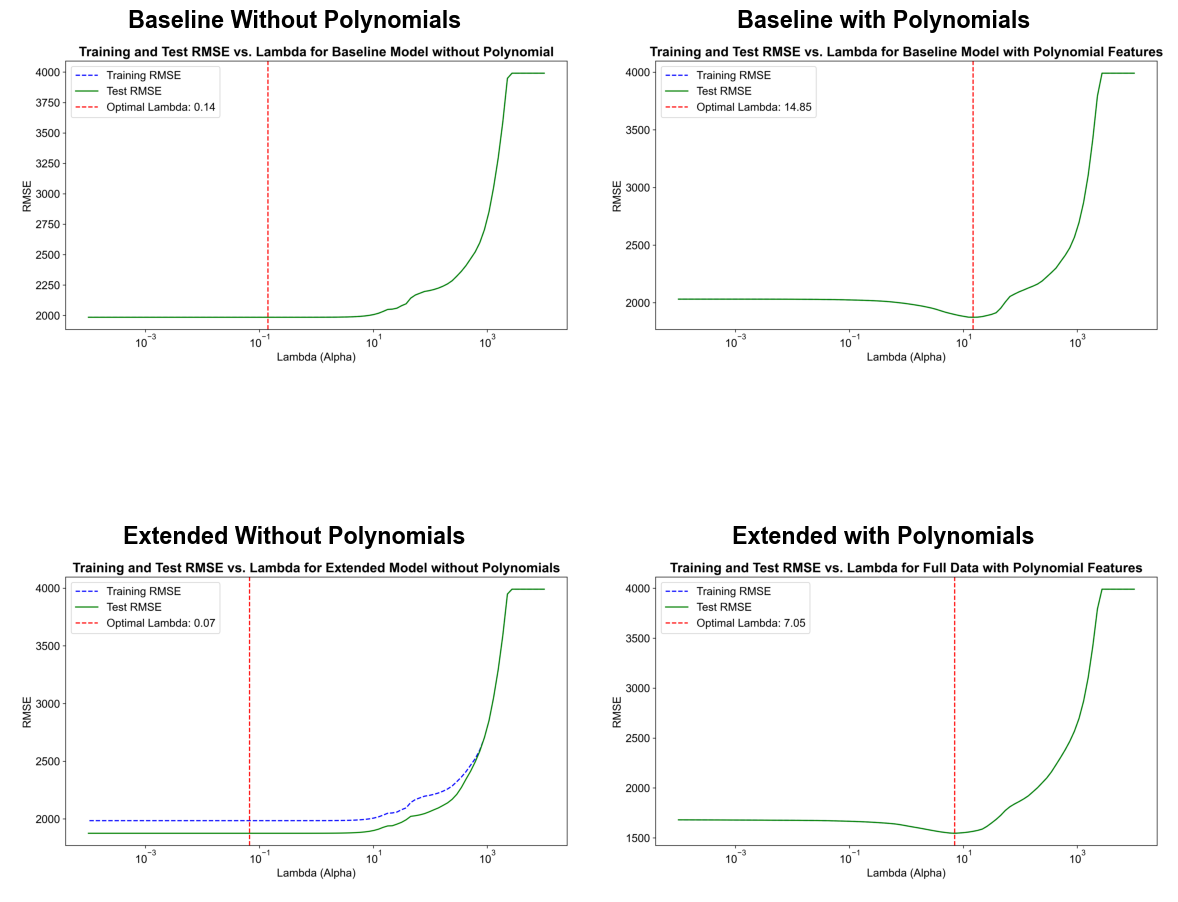

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set global font details
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 14

# Load the images
img1 = mpimg.imread("RMSE_vs_Lambda_Baseline_Without.png")
img2 = mpimg.imread("RMSE_vs_Lambda_Subdata_Poly.png")
img3 = mpimg.imread("RMSE_vs_Lambda_FullData.png")
img4 = mpimg.imread("RMSE_vs_Lambda_Extended_med_Polynomials.png")

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Adjust space between plots
fig.subplots_adjust(hspace=0.1, wspace=0.1)

# Display the images
axs[0, 0].imshow(img1)
axs[0, 0].axis('off')
axs[0, 0].set_title("Baseline Without Polynomials", fontweight='bold')

axs[0, 1].imshow(img2)
axs[0, 1].axis('off')
axs[0, 1].set_title("Baseline with Polynomials", fontweight='bold')

axs[1, 0].imshow(img3)
axs[1, 0].axis('off')
axs[1, 0].set_title("Extended Without Polynomials", fontweight='bold')

axs[1, 1].imshow(img4)
axs[1, 1].axis('off')
axs[1, 1].set_title("Extended with Polynomials", fontweight='bold')

# Save the combined figure in high resolution
plt.tight_layout()
plt.savefig("Refined_Combined_RMSE_vs_Lambda.png", bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show()
